In [1]:
import unimodal_model as um
import importlib as imp
from PIL import Image
import numpy as np
import pandas as pd
import os
from imblearn.over_sampling import RandomOverSampler
imp.reload(um)

2023-03-02 21:02:44.139932: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-02 21:02:44.505283: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: 
2023-03-02 21:02:44.505310: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-02 21:02:44.556026: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-02 21:02:46.342695: W tensorflow/

<module 'unimodal_model' from '/gpfs/data/rsingh47/anair27/singh-lab-TCGA-project/multiomic-model-tcga/models/MAVI/unimodal_model.py'>

In [15]:
IMAGE = "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/imaging_data_updated"
CLINICAL = "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/PRCSD_clinical_data.csv"

In [3]:
example_case = "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/imaging_data_updated/TCGA-69-7978.jpeg"

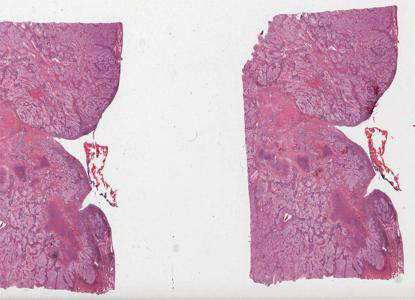

In [4]:
example_image = Image.open(example_case)
example_image

In [5]:
np.array(example_image).shape

(300, 415, 3)

In [164]:
import matplotlib.pyplot as plt

In [58]:
np.array(example_image)

array([[[243, 243, 243],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [237, 239, 238],
        [237, 239, 238],
        [235, 239, 238]],

       [[243, 243, 243],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [237, 239, 238],
        [237, 239, 238],
        [235, 239, 238]],

       [[243, 243, 243],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [237, 239, 238],
        [237, 239, 238],
        [235, 239, 238]],

       ...,

       [[216, 215, 213],
        [213, 212, 210],
        [213, 212, 210],
        ...,
        [216, 215, 213],
        [216, 215, 213],
        [216, 215, 213]],

       [[208, 207, 203],
        [205, 204, 200],
        [205, 204, 200],
        ...,
        [217, 213, 210],
        [217, 213, 210],
        [217, 213, 210]],

       [[204, 203, 199],
        [201, 200, 196],
        [201, 200, 196],
        ...,
        [224, 220, 217],
        [224, 220, 217],
        [225, 221, 218]]

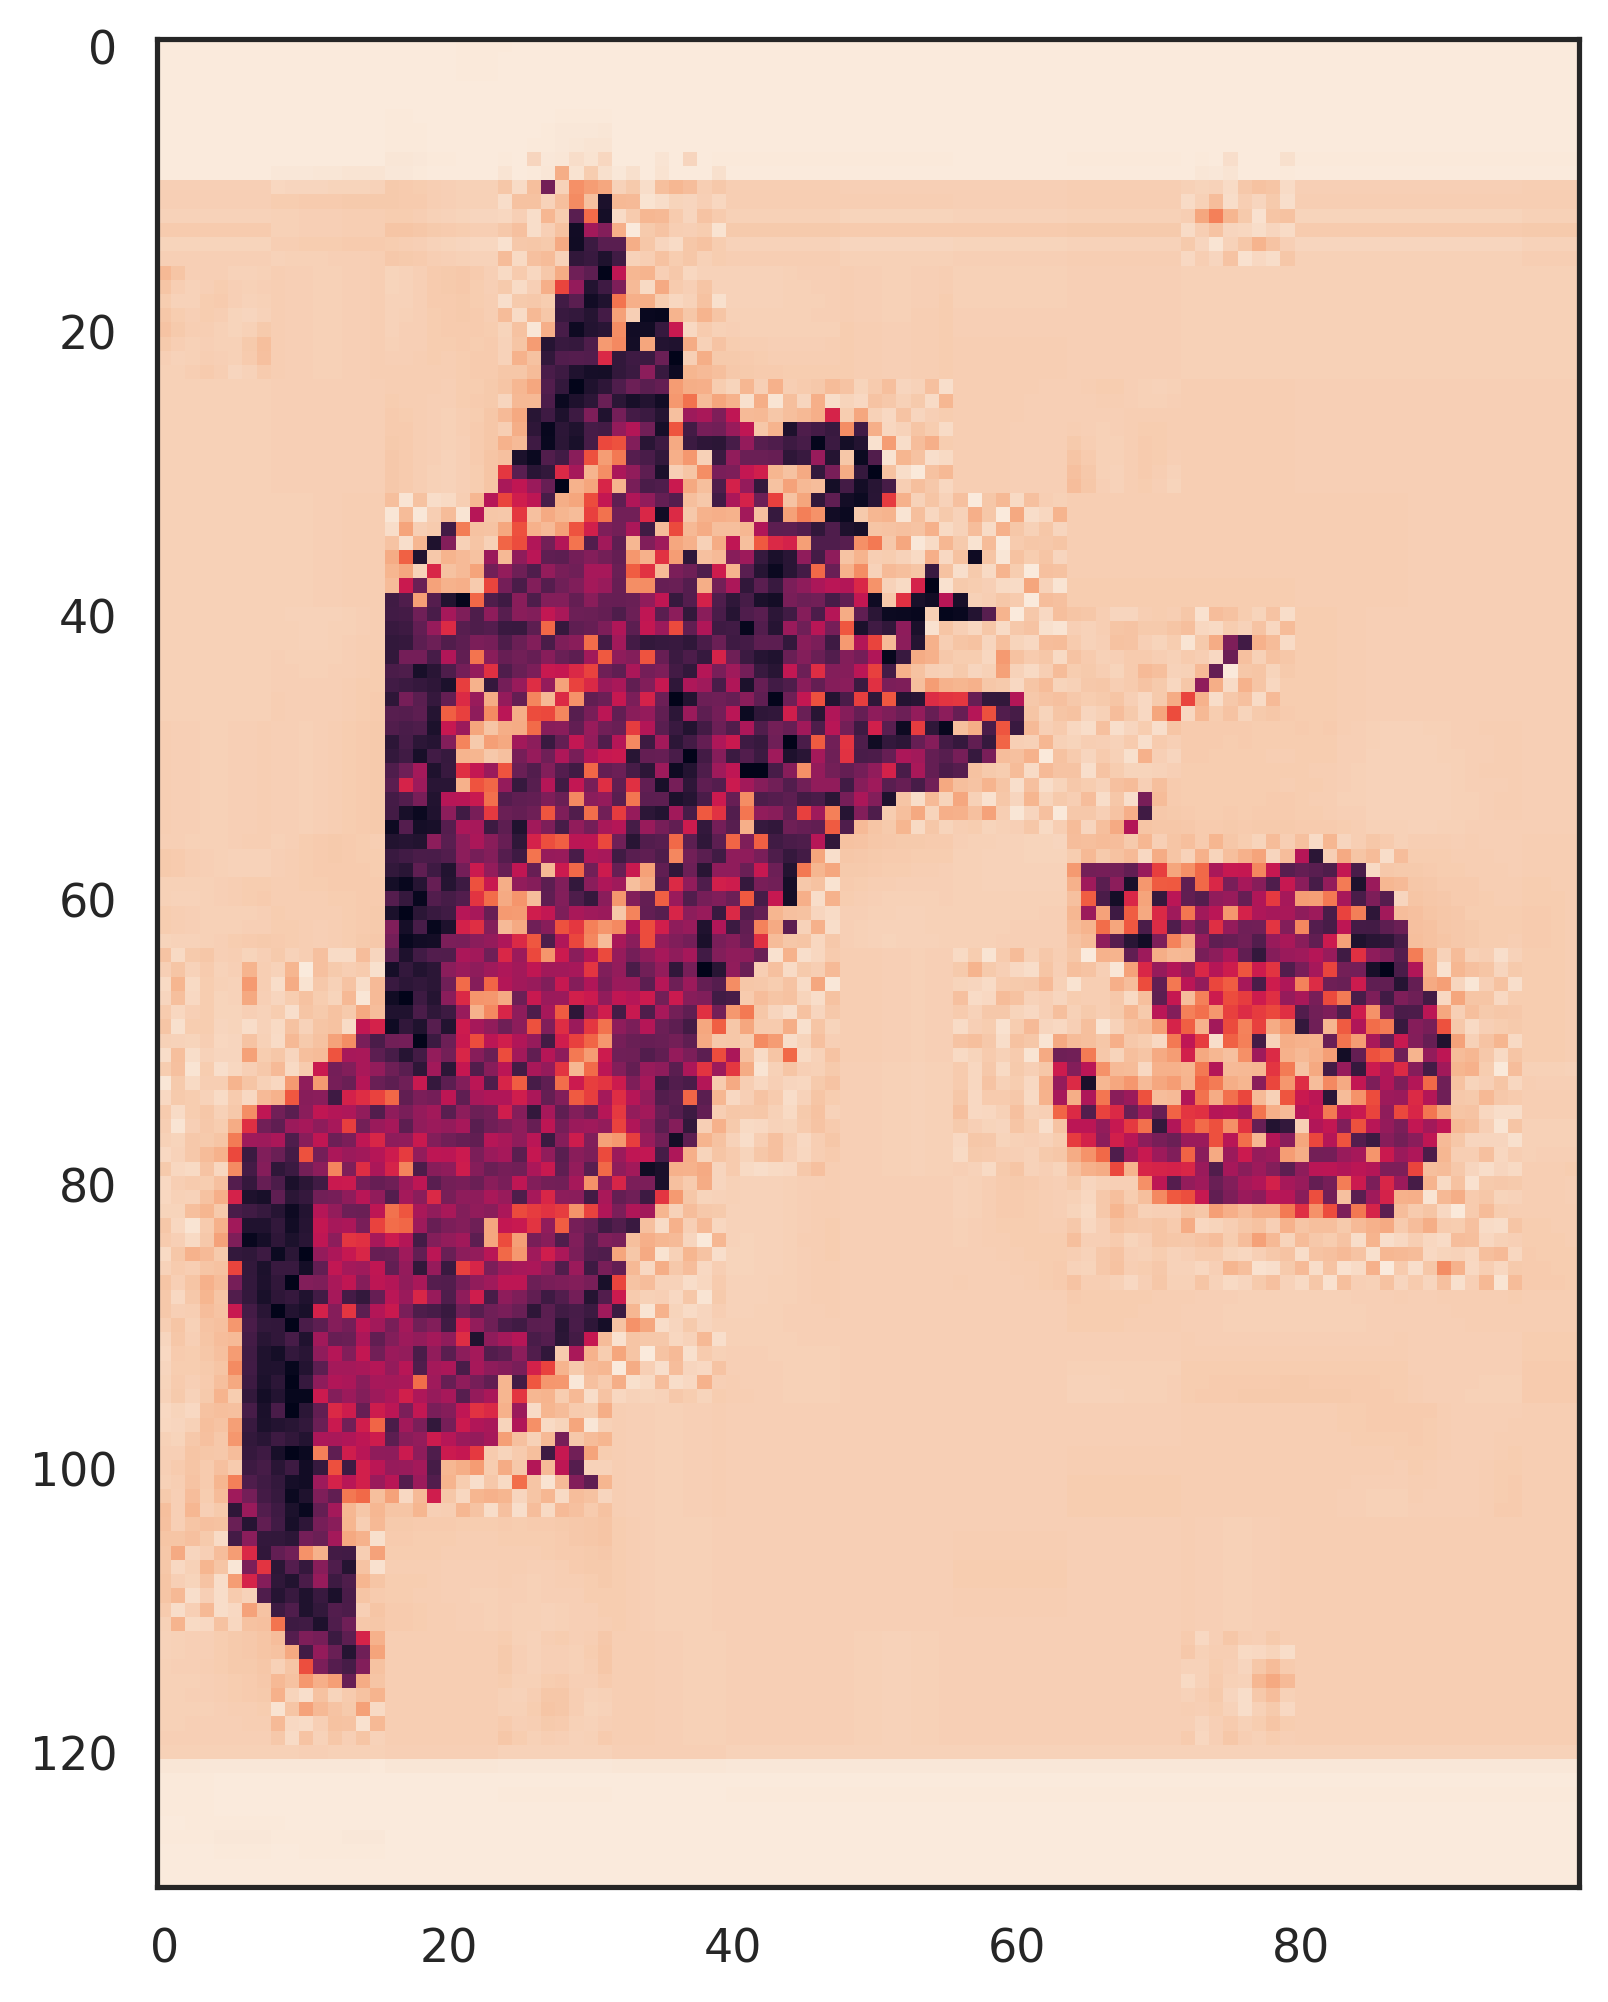

In [165]:
plt.imshow(np.array(example_image)[:,:,1])

In [6]:
training_cases = list(pd.read_csv("/users/anair27/data/TCGA_Data/project_LUAD/data_processed/training_cases.csv")["case_id"])
testing_cases = list(pd.read_csv("/users/anair27/data/TCGA_Data/project_LUAD/data_processed/testing_cases.csv")["case_id"])

In [7]:
len(training_cases)

389

In [8]:
image_size = np.array(example_image).shape

In [9]:
X_train = np.empty((len(training_cases),) + image_size, dtype='float32')
y_train = np.empty((len(training_cases),), dtype='int')
X_test = np.empty((len(testing_cases),) + image_size, dtype='float32')
y_test = np.empty((len(testing_cases),), dtype='int')

In [10]:
from imblearn.over_sampling import RandomOverSampler

In [11]:
clinical_df = pd.read_csv(CLINICAL)

In [12]:
diagnosis = clinical_df[["vital_status_Dead", "case_id"]]

In [13]:
(int)(diagnosis[diagnosis["case_id"] == 'TCGA-55-8205']["vital_status_Dead"])

0

In [16]:
# Load and convert the images
for i, case_id in enumerate(training_cases):
    # Load the image file
    image_file = os.path.join(IMAGE, f'{case_id}.jpeg')
    image = Image.open(image_file)

    # Resize the image and convert it to the output format
    # image = image.resize(image_size)
    image = np.array(image, dtype='float32')
    image /= 255.0

    # Store the image and its label in the output data structure
    X_train[i] = image
    y_train[i] = (int)(diagnosis[diagnosis["case_id"] == case_id]["vital_status_Dead"])

In [17]:
# Load and convert the images
for i, case_id in enumerate(testing_cases):
    # Load the image file
    image_file = os.path.join(IMAGE, f'{case_id}.jpeg')
    image = Image.open(image_file)

    # Resize the image and convert it to the output format
    # image = image.resize(image_size)
    image = np.array(image, dtype='float32')
    image /= 255.0

    # Store the image and its label in the output data structure
    X_test[i] = image
    y_test[i] = (int)(diagnosis[diagnosis["case_id"] == case_id]["vital_status_Dead"])

In [18]:
y_train

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,

In [19]:
image_size

(300, 415, 3)

In [180]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [35]:
model, hist = um.create_model_image(X_train, y_train, image_shape=image_size, \
                                 n_hidden = 1, lr = 0.01, optimizer= 'adam', n_epochs = 3, batch_size = None,\
                                 balance_class=True)

Epoch 1/3
11/11 [==============================] - 44s 4s/step - loss: 17.8406 - accuracy: 0.4343 - val_loss: 3.8822 - val_accuracy: 0.6923
Epoch 2/3
11/11 [==============================] - 42s 4s/step - loss: 4.7585 - accuracy: 0.5200 - val_loss: 2.3658 - val_accuracy: 0.3077
Epoch 3/3
11/11 [==============================] - 41s 4s/step - loss: 0.9497 - accuracy: 0.4886 - val_loss: 0.6595 - val_accuracy: 0.6410


In [55]:
v_acc = model.history.history['val_accuracy'].pop()
v_acc

0.3076923191547394

In [57]:
hist.history['val_accuracy']

[0.692307710647583]

In [36]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [62]:
seeds = ["0", "42", "16"]
v_accs = [0.64, 0.55, 0.77]
t_accs = [0.7, 0.5, 0.69]

In [63]:
results = pd.DataFrame({'validation':v_accs,'testing': t_accs, 'seed': seeds})
results

,validation,testing,seed
0,0.64,0.70,0
1,0.55,0.50,42
2,0.77,0.69,16


In [64]:
import matplotlib.pyplot as plt

(0.5, 1.0)

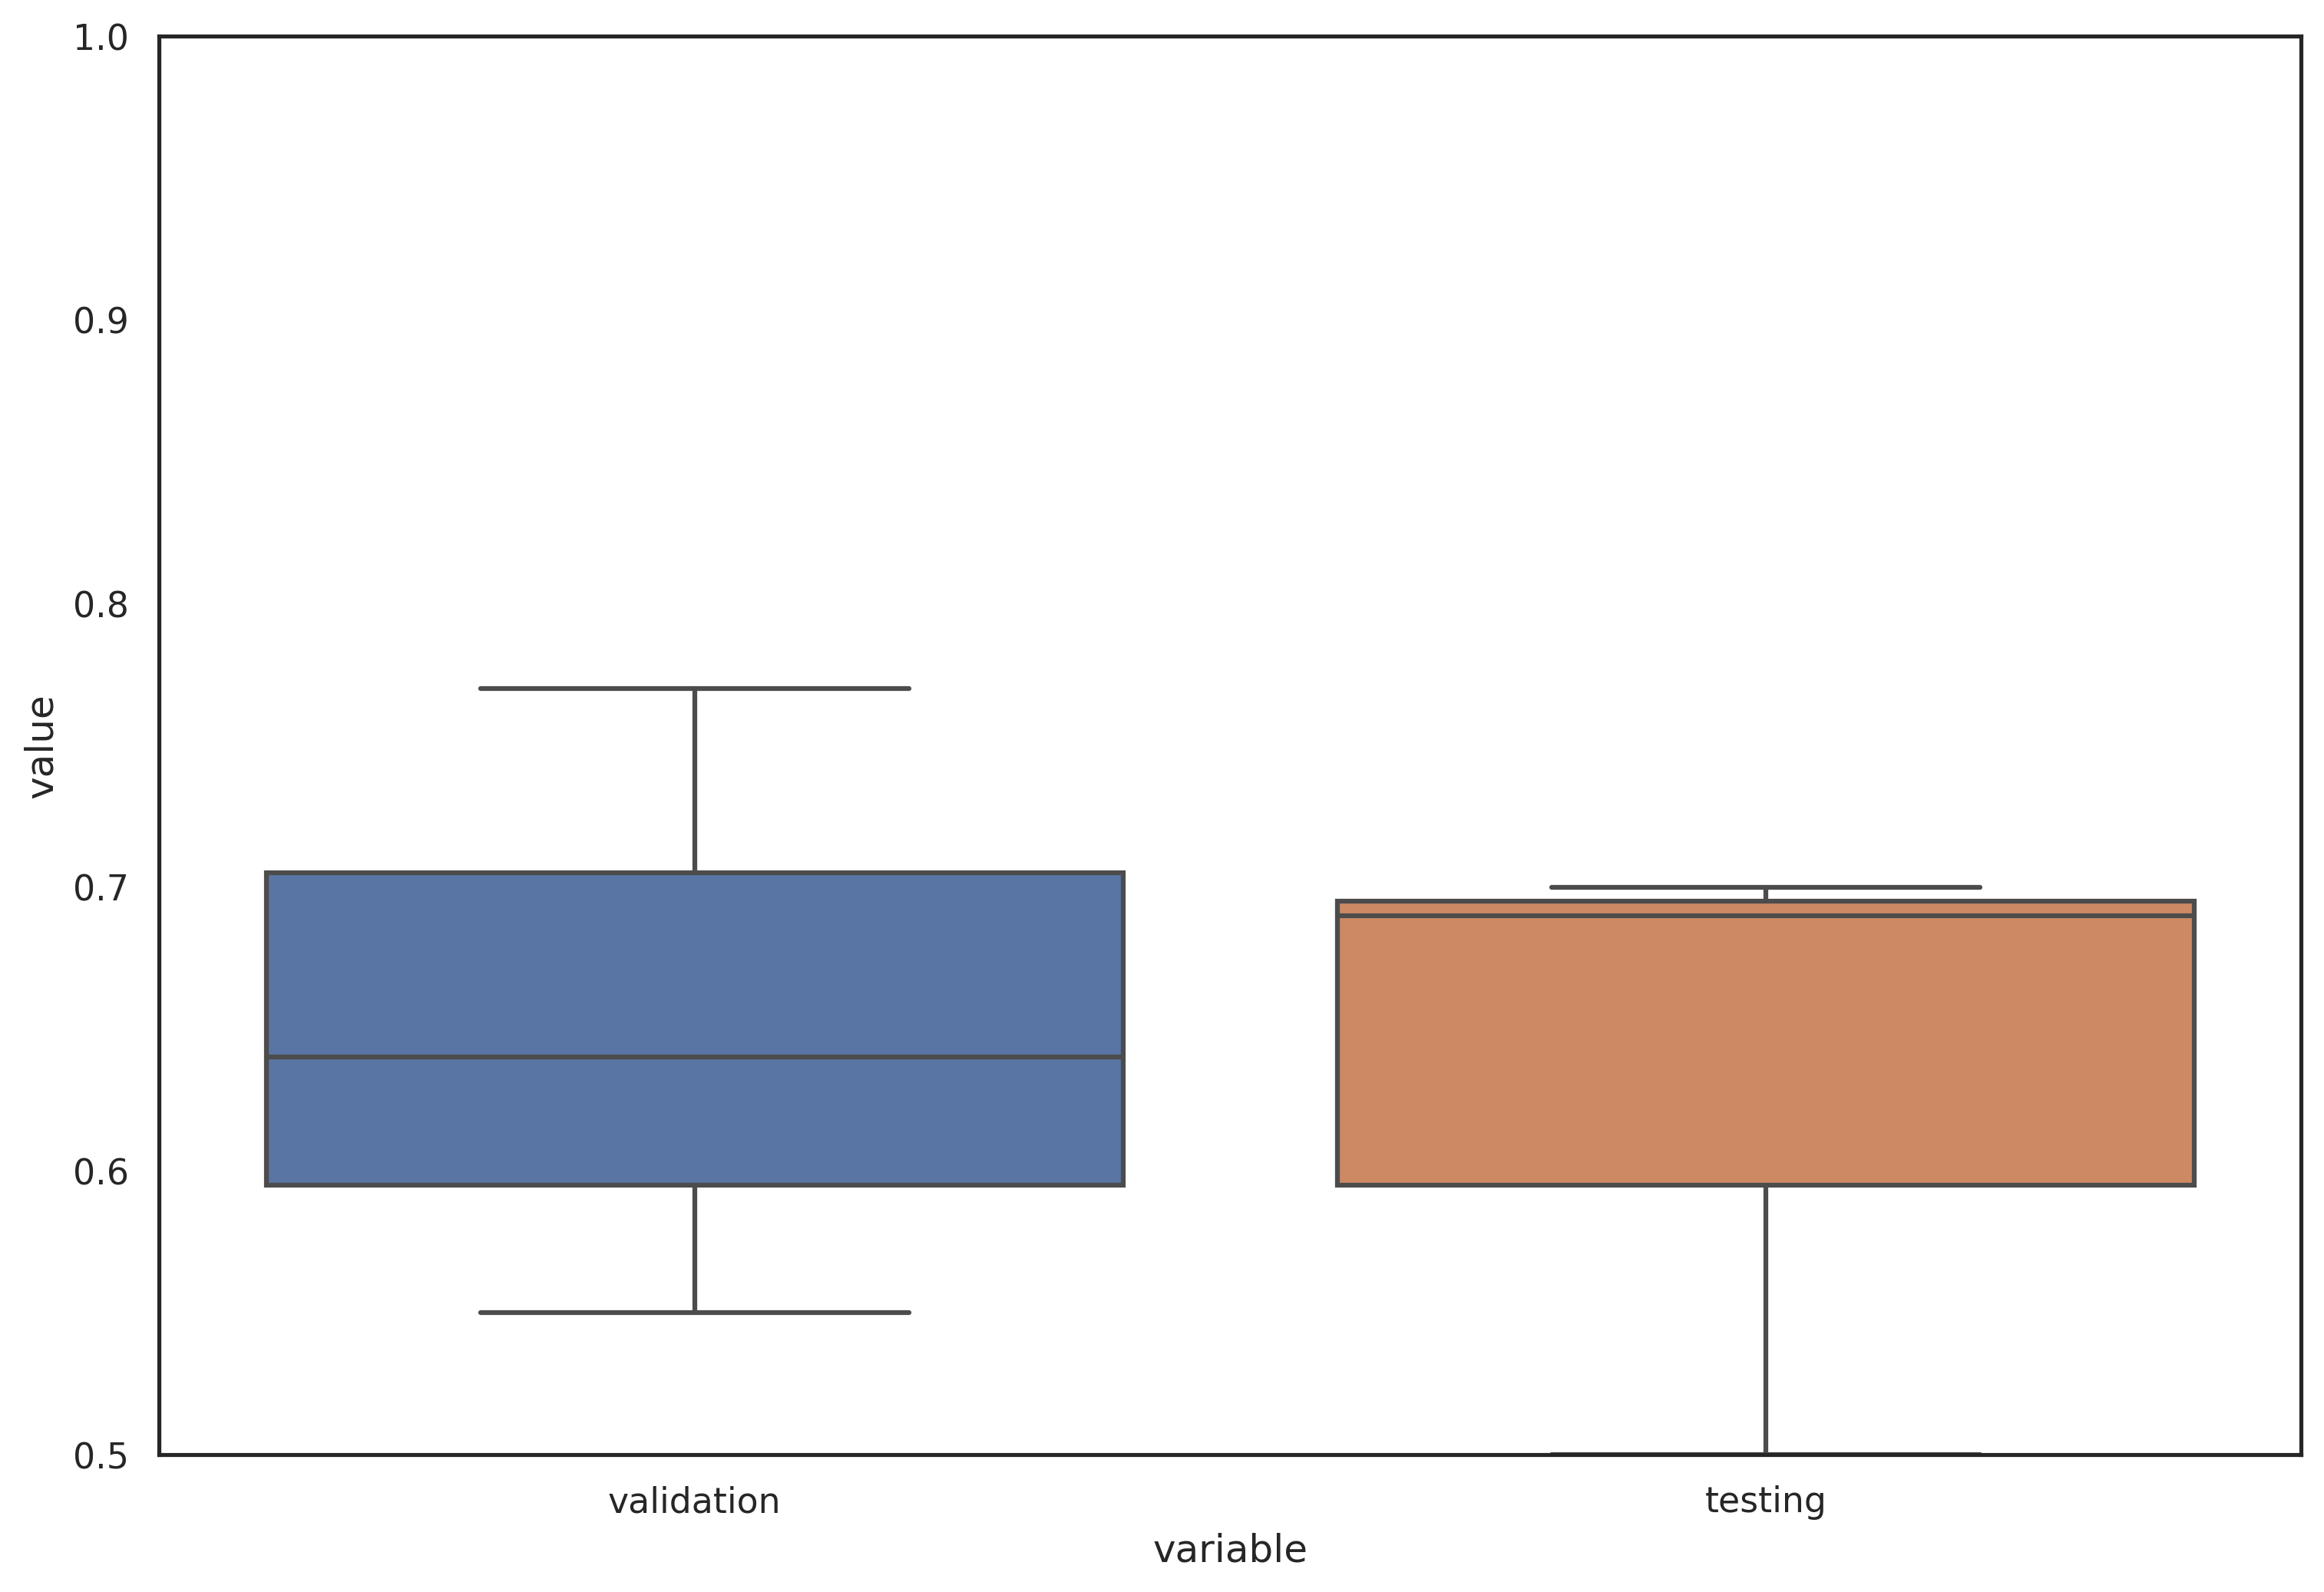

In [68]:
sns.boxplot(x="variable", y="value", data=pd.melt(results, id_vars=["seed"]))
plt.ylim(0.5, 1)

<AxesSubplot: xlabel='validation', ylabel='testing'>

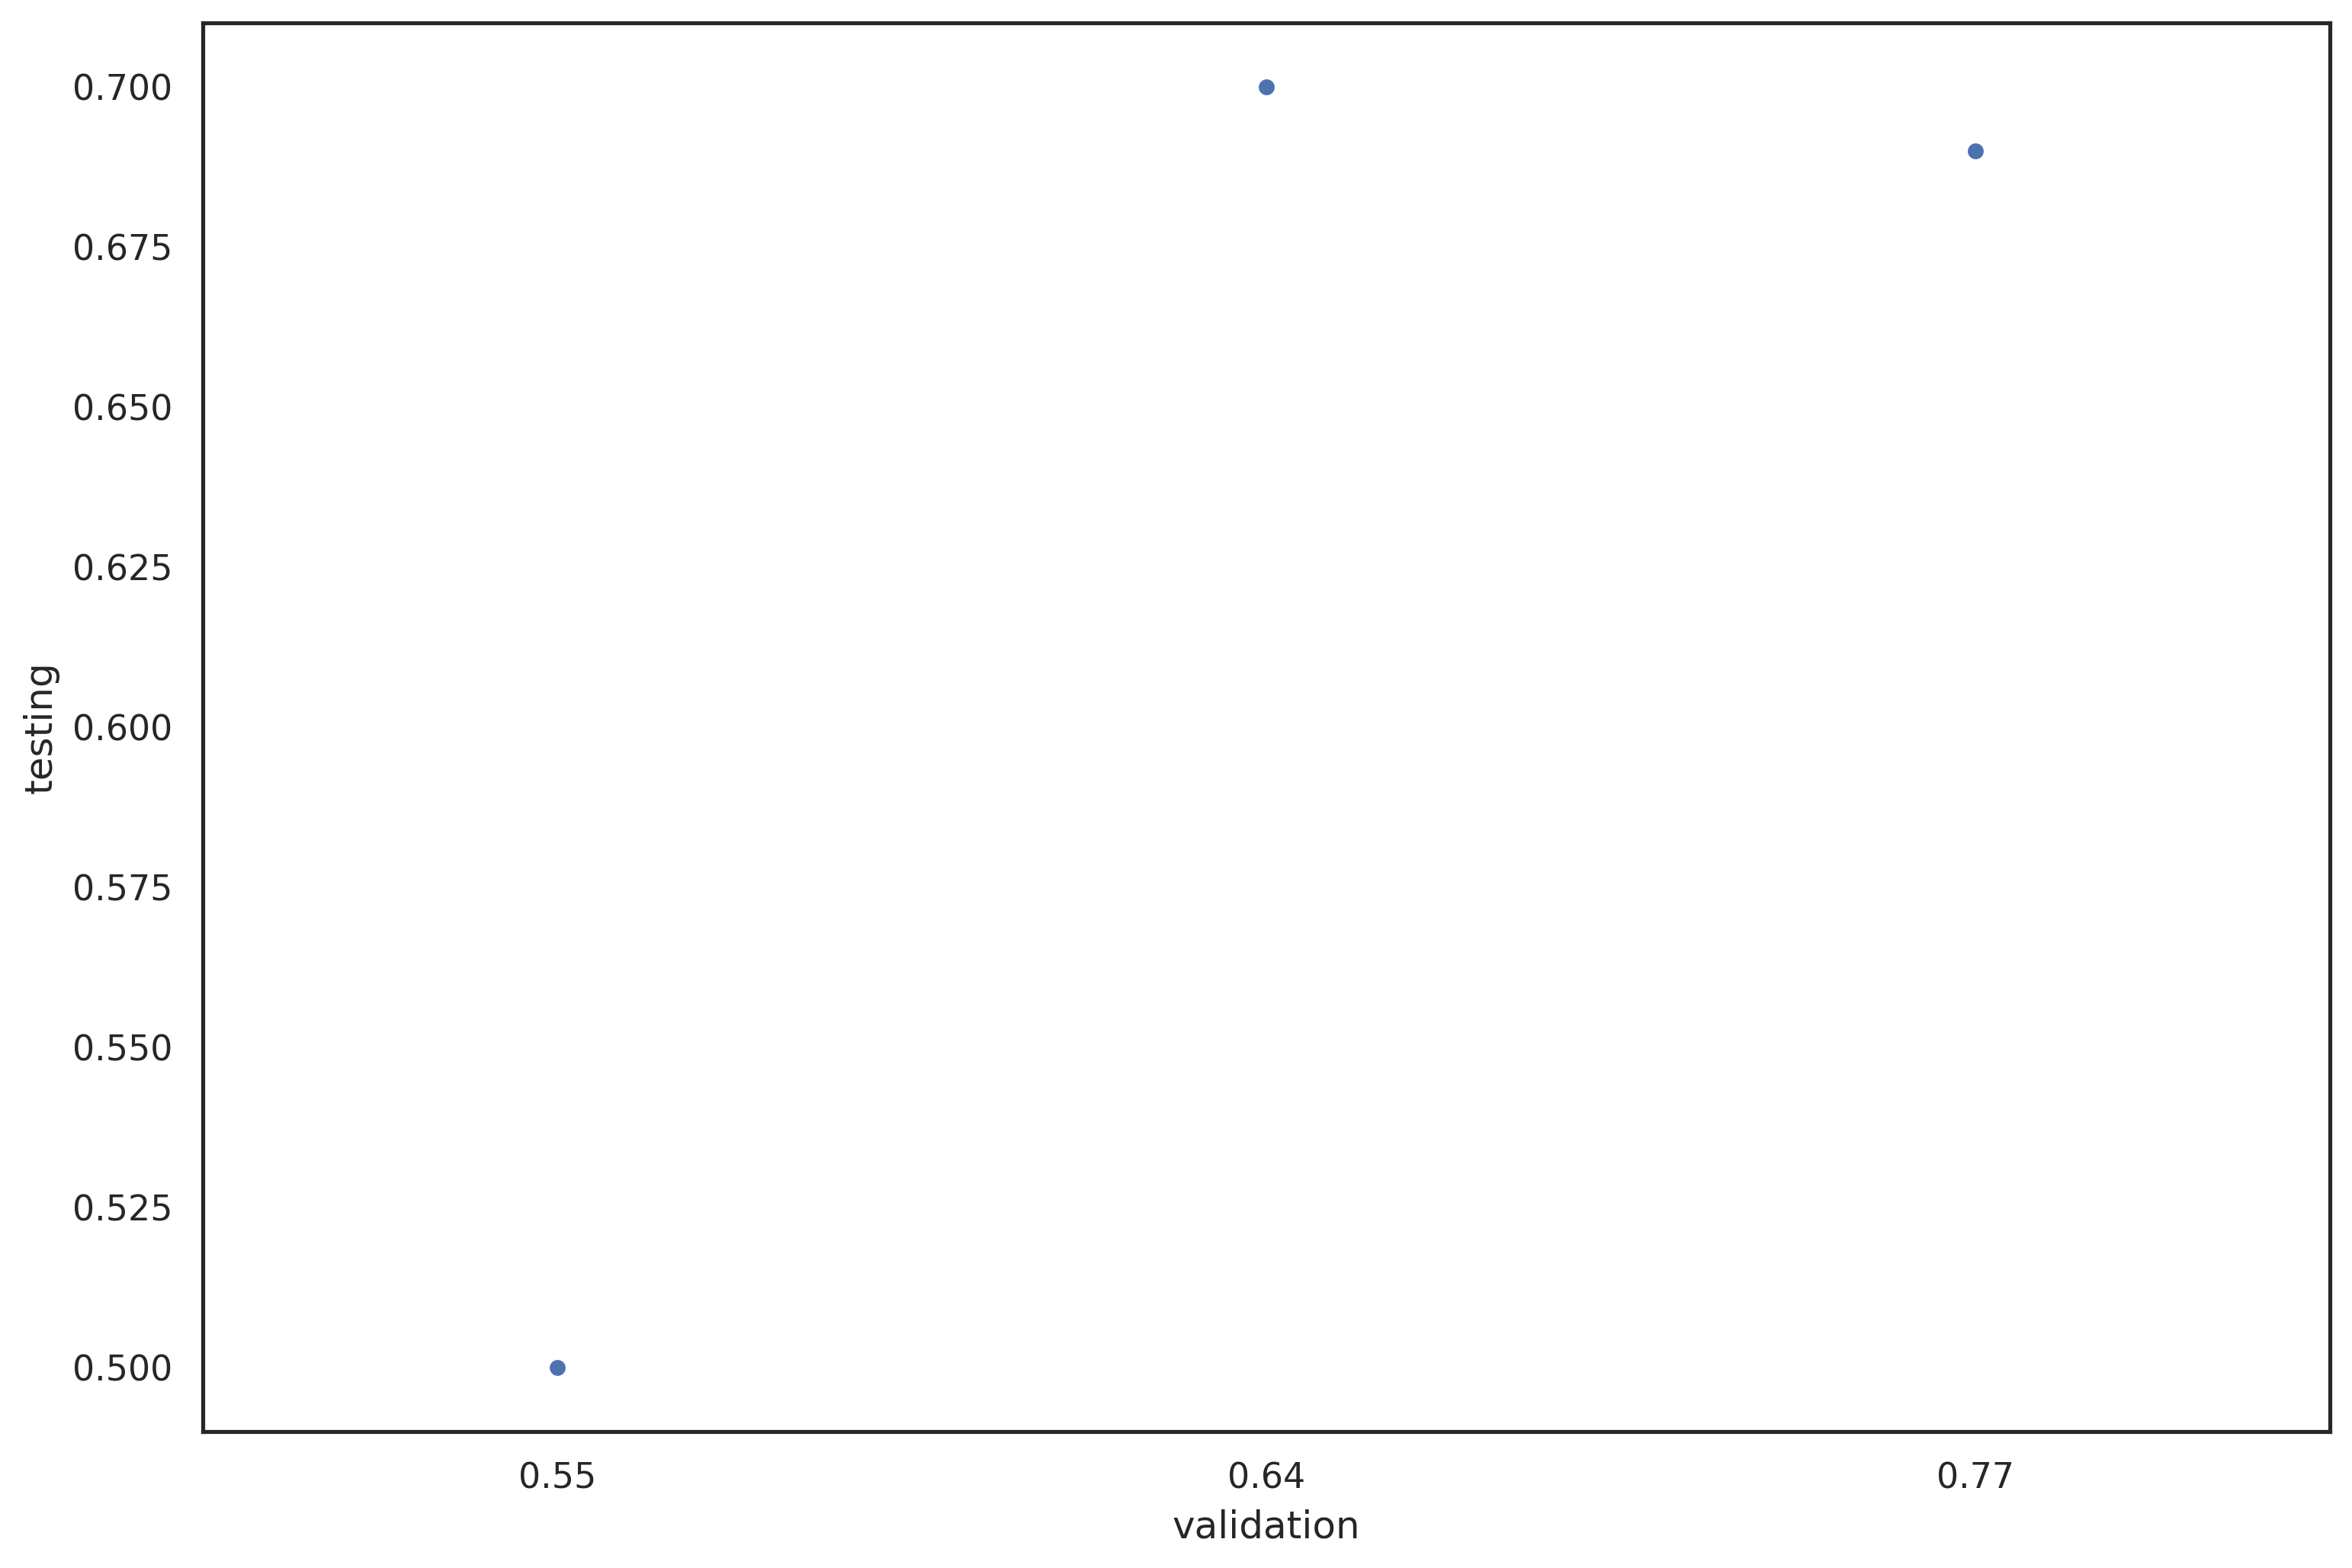

In [43]:
sns.stripplot(x="validation", y = "testing",data=results)

In [116]:
X_train[0].shape

(130, 100, 3)

In [28]:
y_pred_probs = model.predict(X_train[0:10])

1/1 [==============================] - 0s 69ms/step


In [29]:
y_train[0:10]

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [30]:
y_pred = np.argmax(y_pred_probs, axis=1)

In [31]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [37]:
X_test = X_train[0:8]
y_test = y_train[0:8]

Test loss: 0.1484546661376953 / Test accuracy: 0.9562981724739075
13/13 [==============================] - 0s 28ms/step


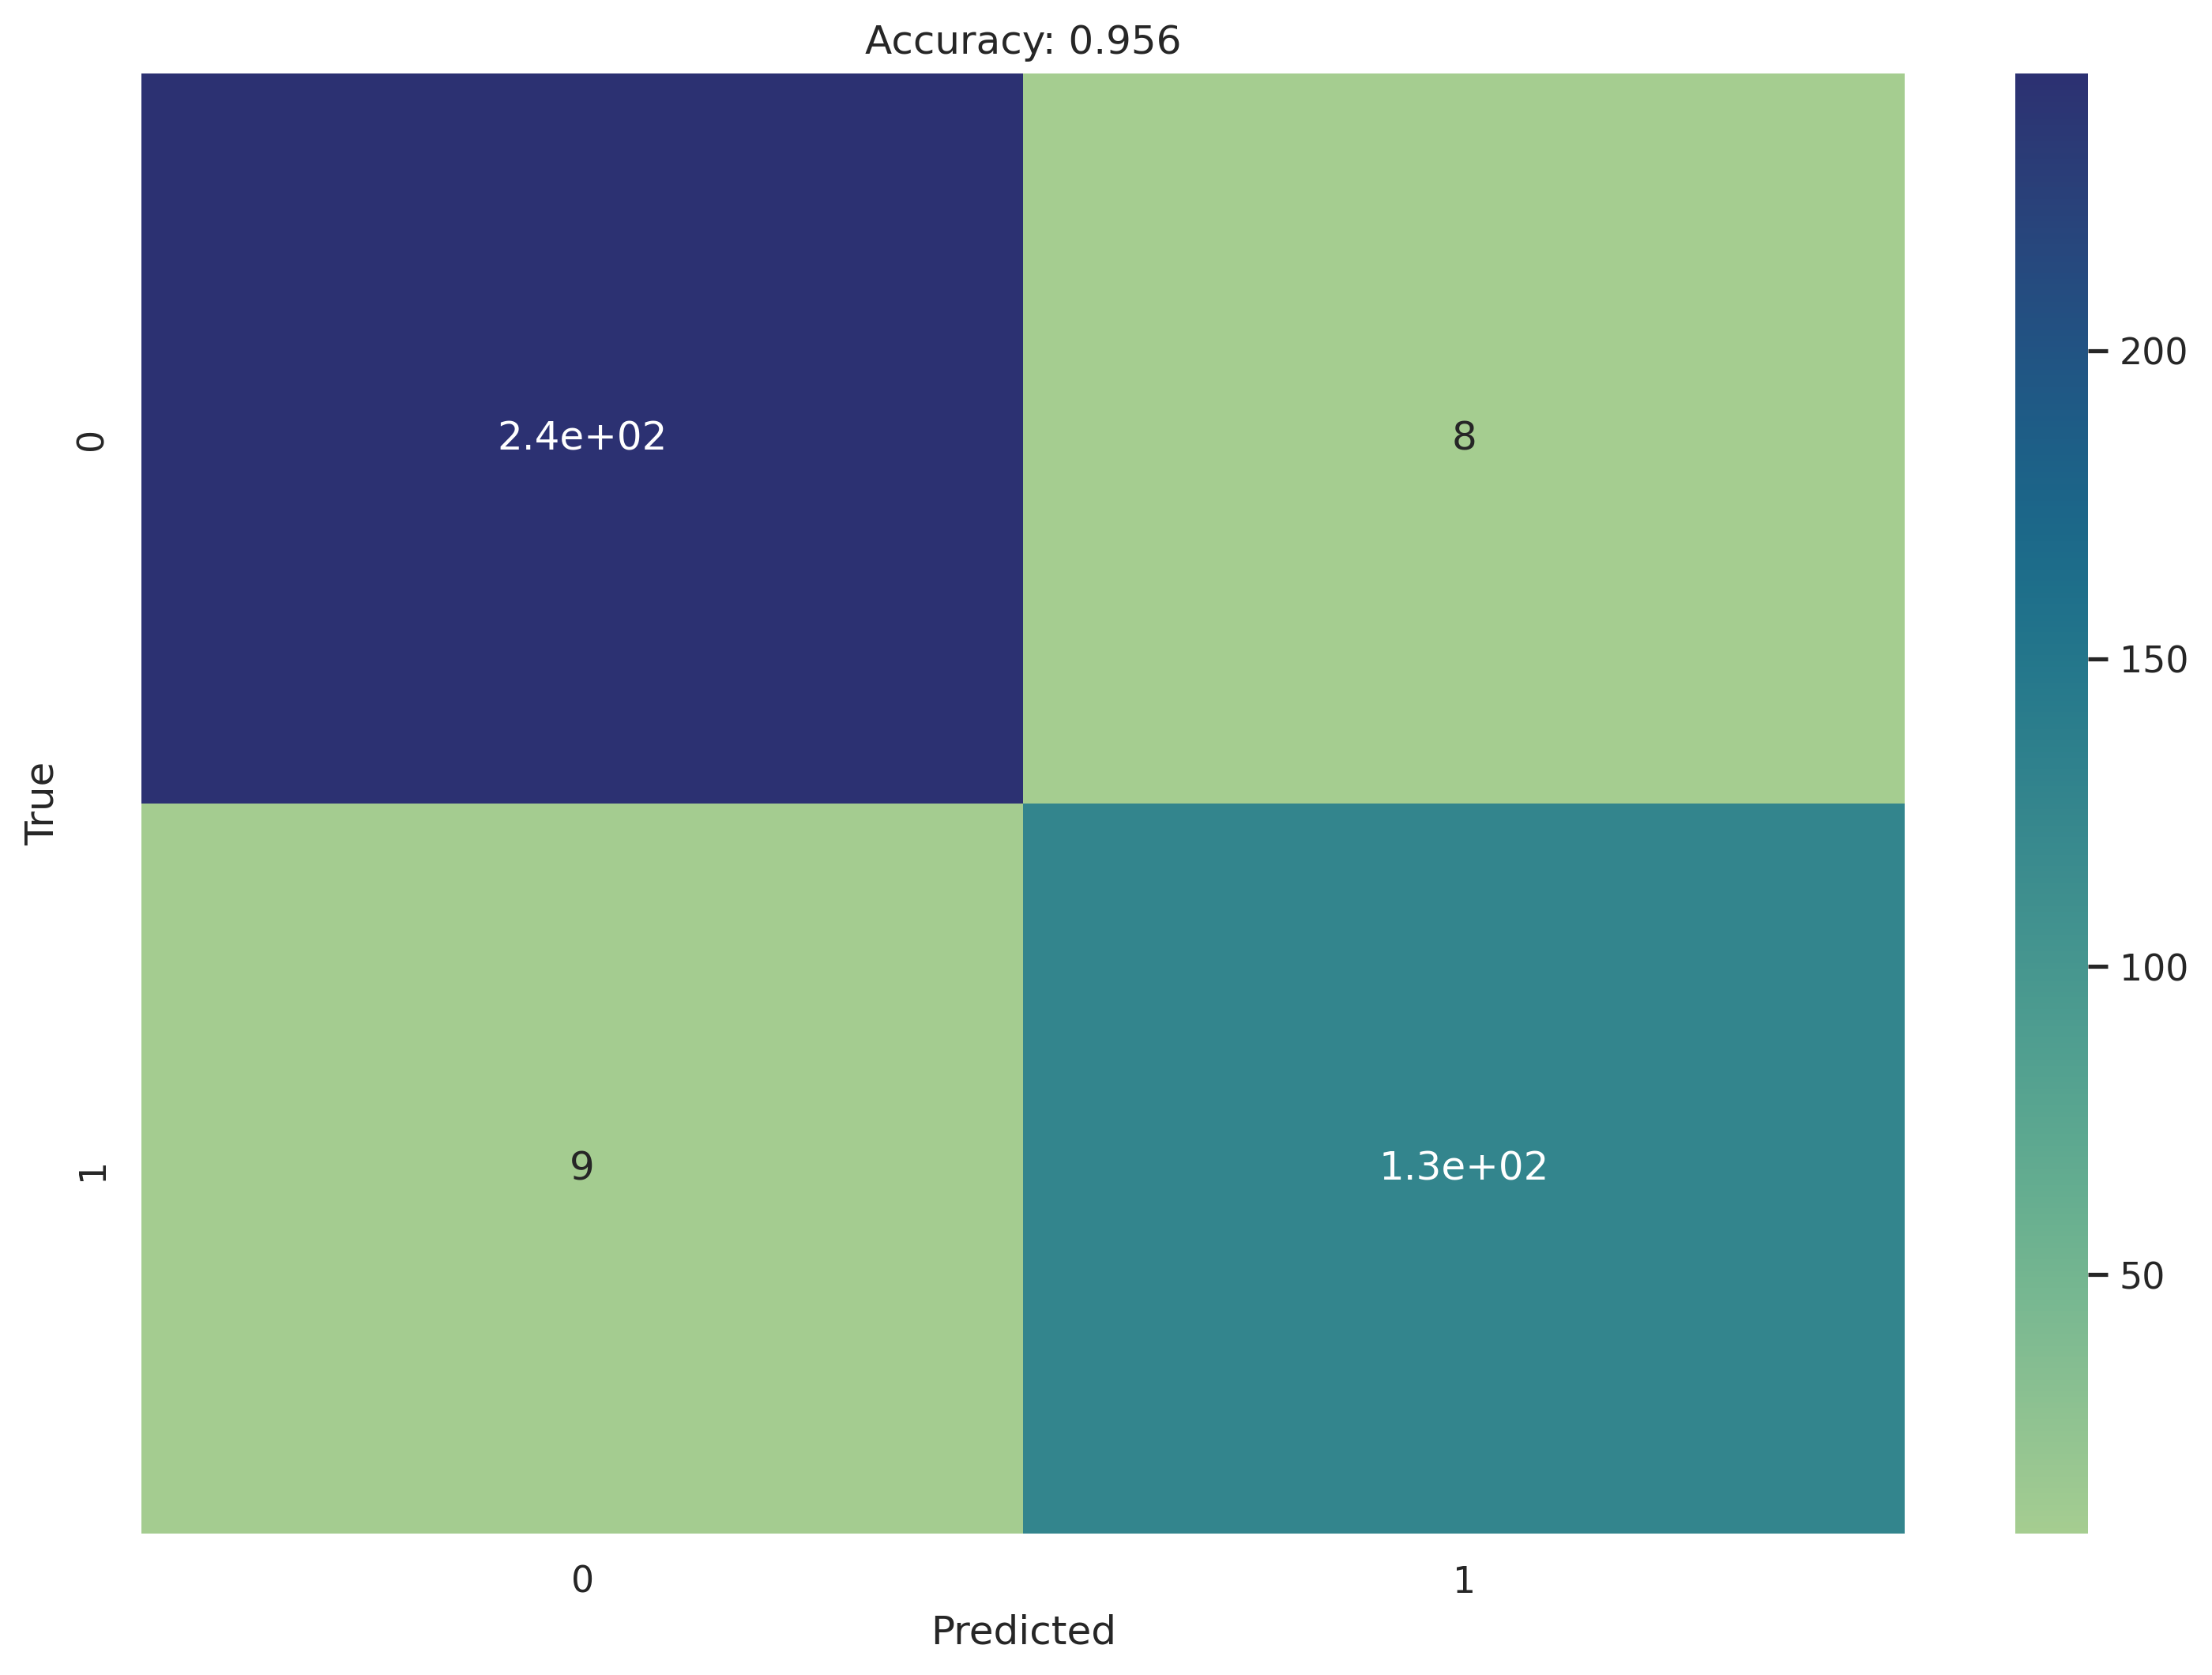

0.956

In [182]:
    um.plot_confusion(model, X_train, y_train)

In [22]:
import seaborn as sns

Test loss: 0.6560126543045044 / Test accuracy: 0.7101449370384216
3/3 [==============================] - 2s 629ms/step


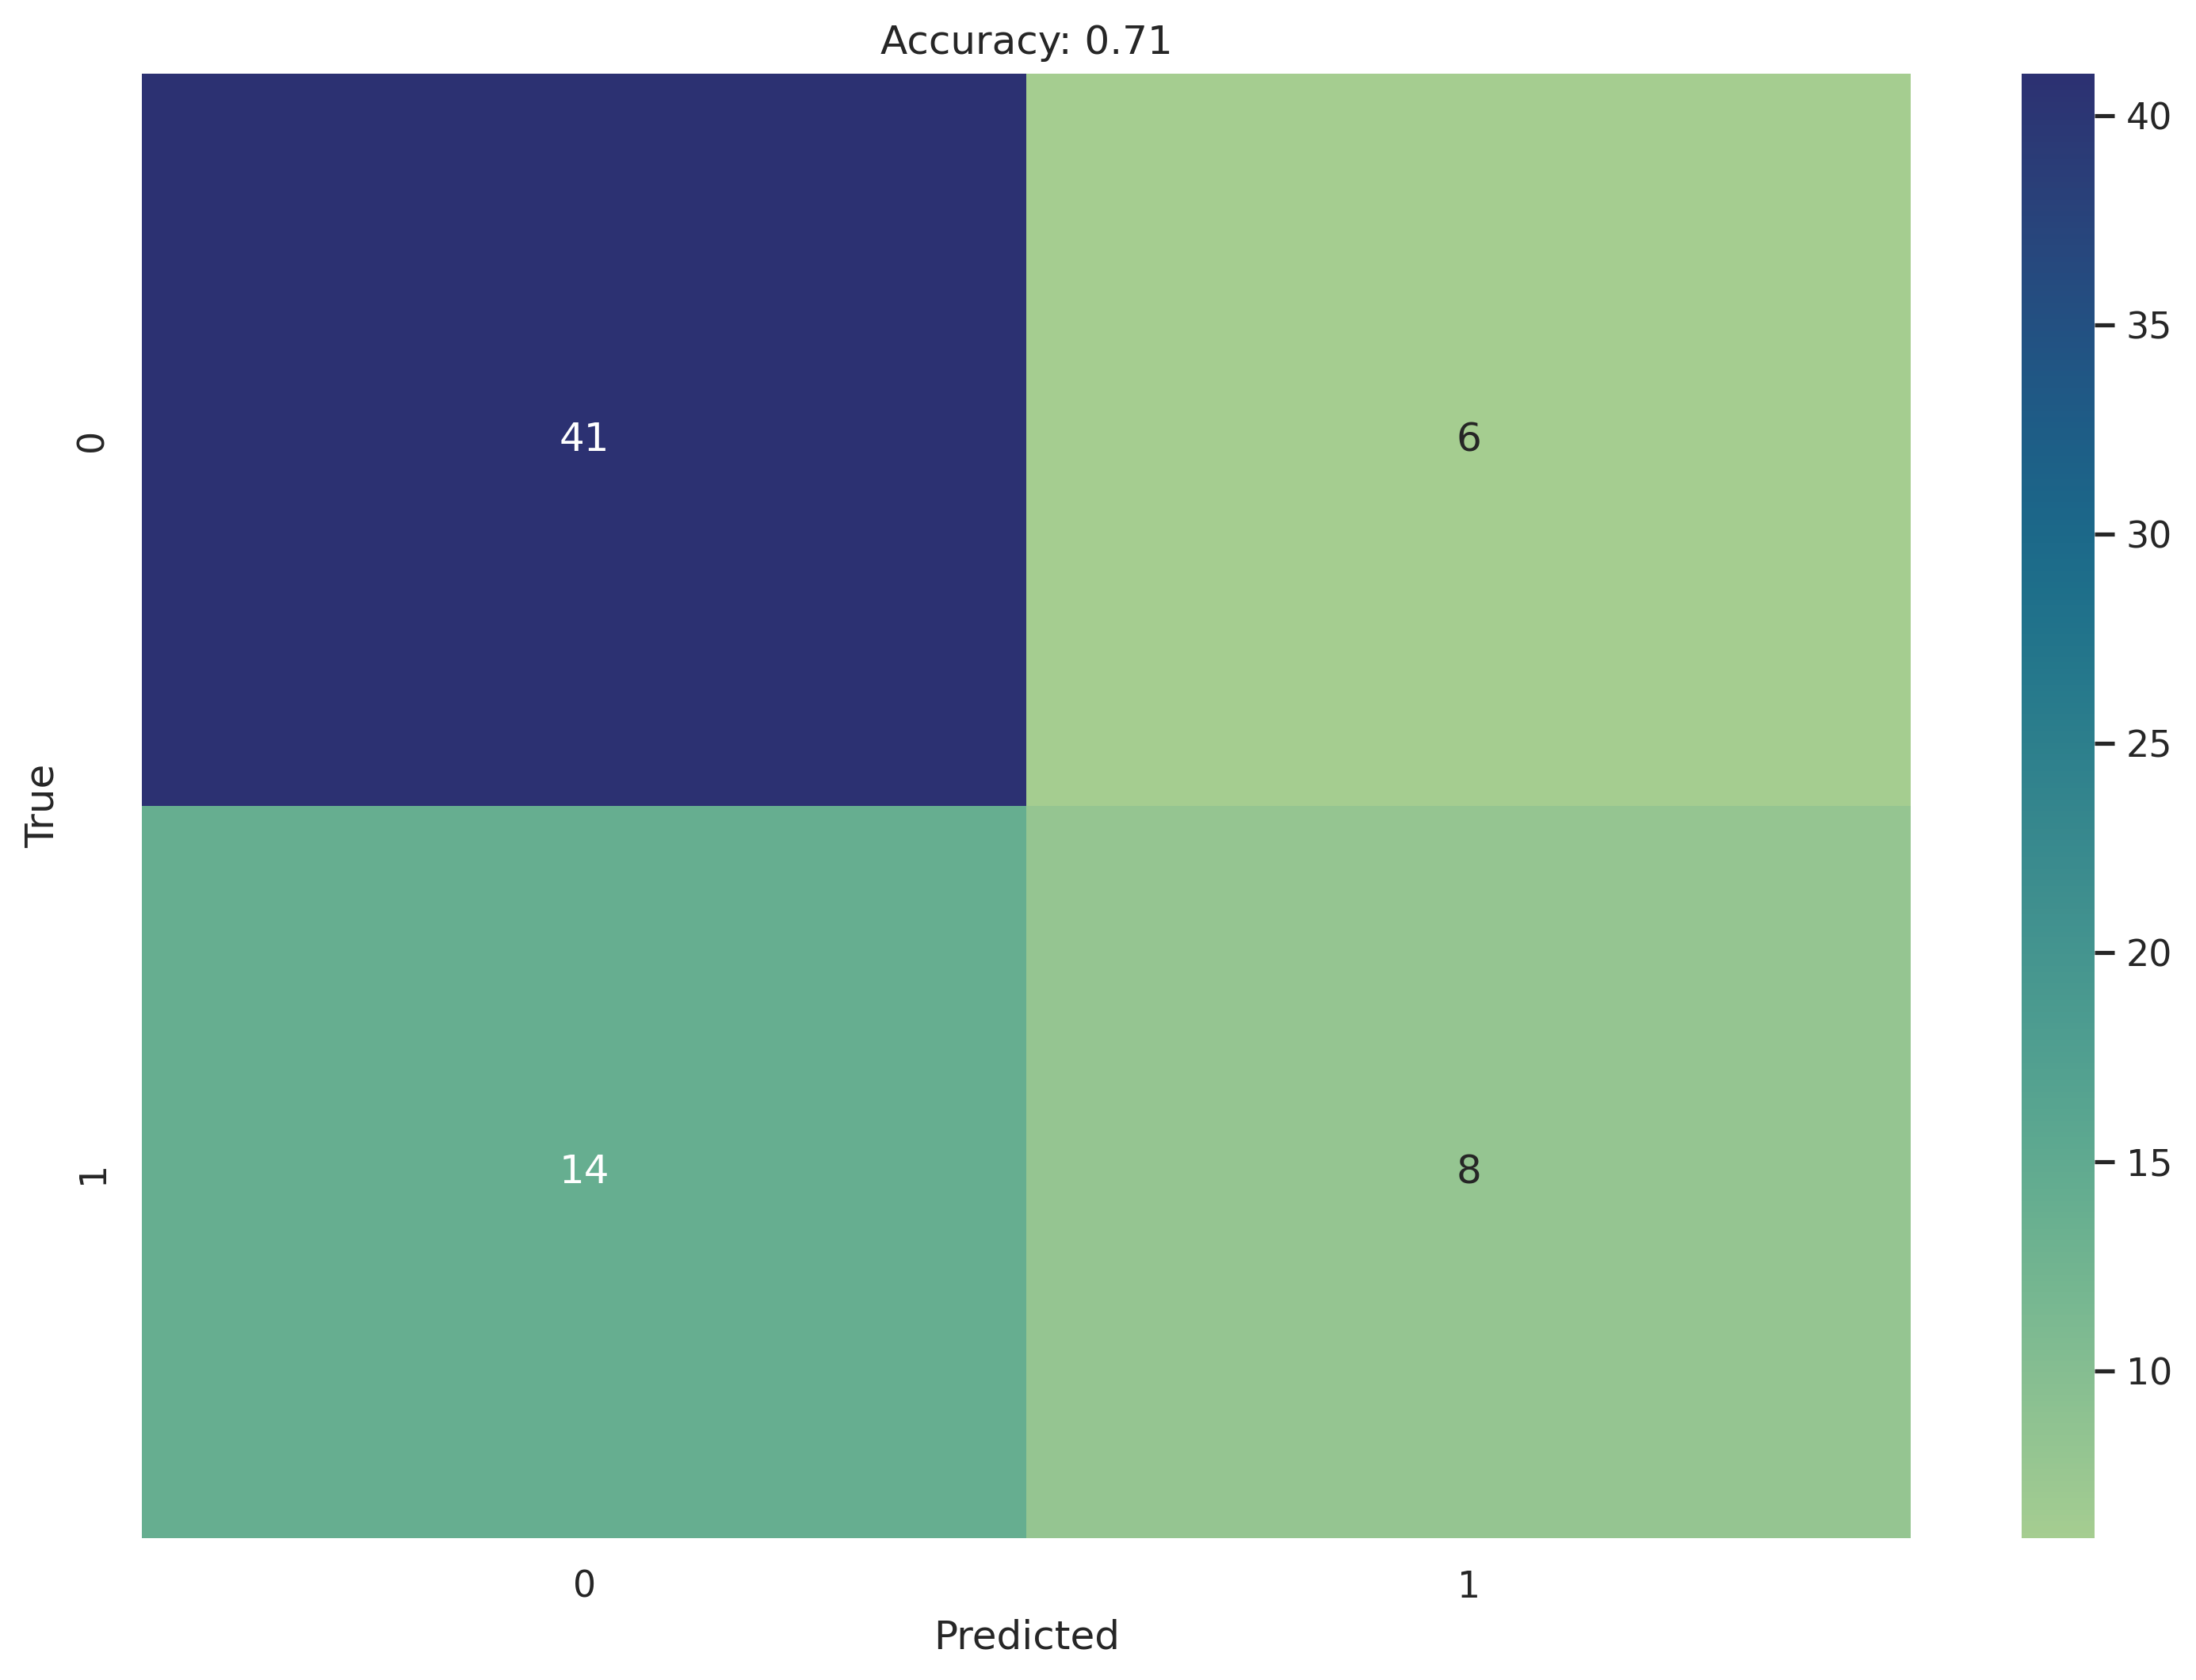

In [24]:
sns.set()
sns.set(rc={'figure.figsize':(12,8), 'figure.dpi': 300})   
sns.set_theme(style='white') 
acc = um.plot_confusion(model, X_test, y_test)

In [25]:
acc

0.71

In [41]:
from tensorflow.keras.utils import to_categorical

In [42]:
score = model.evaluate(X_test, to_categorical(y_test), verbose=0)

In [ ]:
score

---

In [108]:
# FIXED HYPERPARAMETERS
EPOCHS_UNSUPERVISED = 150
HIDDEN_DIM = 512
LATENT_DIMS = [32, 64, 256]
LEARNING_RATE_UNSUPERVISED = 0.001
EPOCHS_SUPERVISED = 100
LEARNING_RATE_SUPERVISED = 0.001

CLINICAL = "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/PRCSD_clinical_data.csv"
CNV = "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/PRCSD_cnv_data.csv"
EPIGENOMIC = "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/PRCSD_epigenomic_data.csv"
TRANSCRIPTOMIC = "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/PRCSD_transcriptomic_data.csv"
IMAGING = "/users/anair27/data/TCGA_Data/project_LUAD/data_processed/imaging_data"

In [116]:
clinical_df = pd.read_csv(CLINICAL)
transcriptomic_df = pd.read_csv(TRANSCRIPTOMIC)
diagnosis = clinical_df[["vital_status_Dead", "case_id"]]
data = transcriptomic_df.merge(diagnosis, on = "case_id").drop_duplicates()
data_training = data[data["case_id"].isin(training_cases)]
data_testing = data[data["case_id"].isin(testing_cases)]
x_train = data_training.loc[:, data.columns != "vital_status_dead"]
x_test = data_testing.loc[:, data.columns != "vital_status_dead"]
y_train = data_training["vital_status_Dead"].astype(int)
y_test = data_testing["vital_status_Dead"].astype(int)

In [123]:
x_train.iloc[:,2:]

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,vital_status_Dead
0,46.9281,0.4808,57.9971,1.5523,3.6818,9.8975,6.2302,25.2810,7.0157,10.7645,...,0.0,0.0000,0.7707,0.0000,0.0,0.0,0.0,0.0061,0.1877,0
1,11.7451,0.0000,18.2141,1.8852,0.5896,25.3843,9.8348,17.5786,1.7791,4.4772,...,0.0,0.0077,0.0302,0.0000,0.0,0.0,0.0,0.0279,0.2131,0
2,20.3682,0.0225,31.1076,3.2412,0.9620,3.9068,11.0951,22.6927,4.2451,6.9950,...,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0104,0.0988,0
3,5.6365,0.0000,19.6206,1.4938,0.8152,26.8137,18.2827,20.7673,3.5553,8.0757,...,0.0,0.0000,0.2541,0.0000,0.0,0.0,0.0,0.0107,0.2448,1
4,4.6527,0.0000,30.7542,5.0779,1.0228,3.8962,6.0109,12.6130,11.5452,19.1574,...,0.0,0.0000,0.2708,0.1105,0.0,0.0,0.0,0.0362,0.2391,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,22.1727,0.0613,26.6510,2.6095,1.1747,4.4012,24.2884,7.3748,9.7017,10.1740,...,0.0,0.0000,0.0152,0.0622,0.0,0.0,0.0,0.0047,0.1885,1
510,17.6945,0.1976,22.4199,0.8574,0.6465,5.0291,3.9113,12.8731,0.6119,11.9758,...,0.0,0.0000,0.0227,0.0000,0.0,0.0,0.0,0.0093,0.0801,1
511,24.3521,0.0098,18.7905,1.9846,1.0234,5.1553,7.5910,30.2022,48.3523,10.0687,...,0.0,0.0000,0.2720,0.0000,0.0,0.0,0.0,0.0135,0.1458,1
513,9.1147,0.0099,16.1424,2.6900,0.6635,5.2058,8.3084,6.7483,1.2258,12.8468,...,0.0,0.0000,0.0692,0.0404,0.0,0.0,0.0,0.0244,0.1659,0


In [115]:
len(training_cases)

389

In [114]:
data_training = data[data["case_id"].isin(training_cases)]

,Unnamed: 0,case_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,...,ENSG00000288654.1,ENSG00000288656.1,ENSG00000288658.1,ENSG00000288660.1,ENSG00000288661.1,ENSG00000288669.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,vital_status_Dead
0,0,TCGA-35-4122,46.9281,0.4808,57.9971,1.5523,3.6818,9.8975,6.2302,25.2810,...,0.0,0.0000,0.7707,0.0000,0.0,0.0,0.0,0.0061,0.1877,0
1,0,TCGA-75-6203,11.7451,0.0000,18.2141,1.8852,0.5896,25.3843,9.8348,17.5786,...,0.0,0.0077,0.0302,0.0000,0.0,0.0,0.0,0.0279,0.2131,0
2,0,TCGA-75-5146,20.3682,0.0225,31.1076,3.2412,0.9620,3.9068,11.0951,22.6927,...,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0104,0.0988,0
3,0,TCGA-78-8648,5.6365,0.0000,19.6206,1.4938,0.8152,26.8137,18.2827,20.7673,...,0.0,0.0000,0.2541,0.0000,0.0,0.0,0.0,0.0107,0.2448,1
4,0,TCGA-55-A4DG,4.6527,0.0000,30.7542,5.0779,1.0228,3.8962,6.0109,12.6130,...,0.0,0.0000,0.2708,0.1105,0.0,0.0,0.0,0.0362,0.2391,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,0,TCGA-86-7714,22.1727,0.0613,26.6510,2.6095,1.1747,4.4012,24.2884,7.3748,...,0.0,0.0000,0.0152,0.0622,0.0,0.0,0.0,0.0047,0.1885,1
510,0,TCGA-64-5775,17.6945,0.1976,22.4199,0.8574,0.6465,5.0291,3.9113,12.8731,...,0.0,0.0000,0.0227,0.0000,0.0,0.0,0.0,0.0093,0.0801,1
511,0,TCGA-05-4418,24.3521,0.0098,18.7905,1.9846,1.0234,5.1553,7.5910,30.2022,...,0.0,0.0000,0.2720,0.0000,0.0,0.0,0.0,0.0135,0.1458,1
513,0,TCGA-55-8097,9.1147,0.0099,16.1424,2.6900,0.6635,5.2058,8.3084,6.7483,...,0.0,0.0000,0.0692,0.0404,0.0,0.0,0.0,0.0244,0.1659,0


In [201]:
cnv_hp = pd.read_csv("/users/anair27/data/anair27/singh-lab-TCGA-project/multiomic-model-tcga/__plots/Feb-27-14:18:16/cnv_results.csv", header = None)
epigenomic_hp = pd.read_csv("/users/anair27/data/anair27/singh-lab-TCGA-project/multiomic-model-tcga/__plots/Feb-27-14:18:16/epigenomic_results.csv", header = None)
transcriptomic_hp = pd.read_csv("/users/anair27/data/anair27/singh-lab-TCGA-project/multiomic-model-tcga/__plots/Feb-27-14:18:16/transcriptomic_results.csv", header = None)

In [202]:
cnv_hp = cnv_hp.rename(columns={0:'test', 1:'cnv'})
cnv_hp

,test,cnv
0,With FR to 32 accuracy,0.558
1,Without FR to 32 accuracy,0.601
2,With FR to 64 accuracy,0.616
3,Without FR to 64 accuracy,0.674
4,With FR to 256 accuracy,0.493
5,Without FR to 256 accuracy,0.377


In [203]:
epigenomic_hp = epigenomic_hp.rename(columns={0:'test', 1:'epigenomic'})
epigenomic_hp

,test,epigenomic
0,With FR to 32 accuracy,0.630
1,Without FR to 32 accuracy,0.696
2,With FR to 64 accuracy,0.732
3,Without FR to 64 accuracy,0.703
4,With FR to 256 accuracy,0.703
5,Without FR to 256 accuracy,0.790


In [204]:
transcriptomic_hp = transcriptomic_hp.rename(columns={0:'test', 1:'transcriptomic'})
transcriptomic_hp

,test,transcriptomic
0,With FR to 32 accuracy,0.500
1,Without FR to 32 accuracy,0.775
2,With FR to 64 accuracy,0.543
3,Without FR to 64 accuracy,0.783
4,With FR to 256 accuracy,0.536
5,Without FR to 256 accuracy,0.616


In [206]:
results_hp = pd.merge(pd.merge(cnv_hp, epigenomic_hp, on = 'test'), transcriptomic_hp, on = 'test')
results_hp

,test,cnv,epigenomic,transcriptomic
0,With FR to 32 accuracy,0.558,0.630,0.500
1,Without FR to 32 accuracy,0.601,0.696,0.775
2,With FR to 64 accuracy,0.616,0.732,0.543
3,Without FR to 64 accuracy,0.674,0.703,0.783
4,With FR to 256 accuracy,0.493,0.703,0.536
5,Without FR to 256 accuracy,0.377,0.790,0.616


In [211]:
results_hp = results_hp.set_index('test')

In [208]:
plt.barh(results_hp)

TypeError: barh() missing 1 required positional argument: 'width'

<AxesSubplot: title={'center': 'Accuracy on testing set across unimodal models trained on various latent dimensions and modalities'}, xlabel='test'>

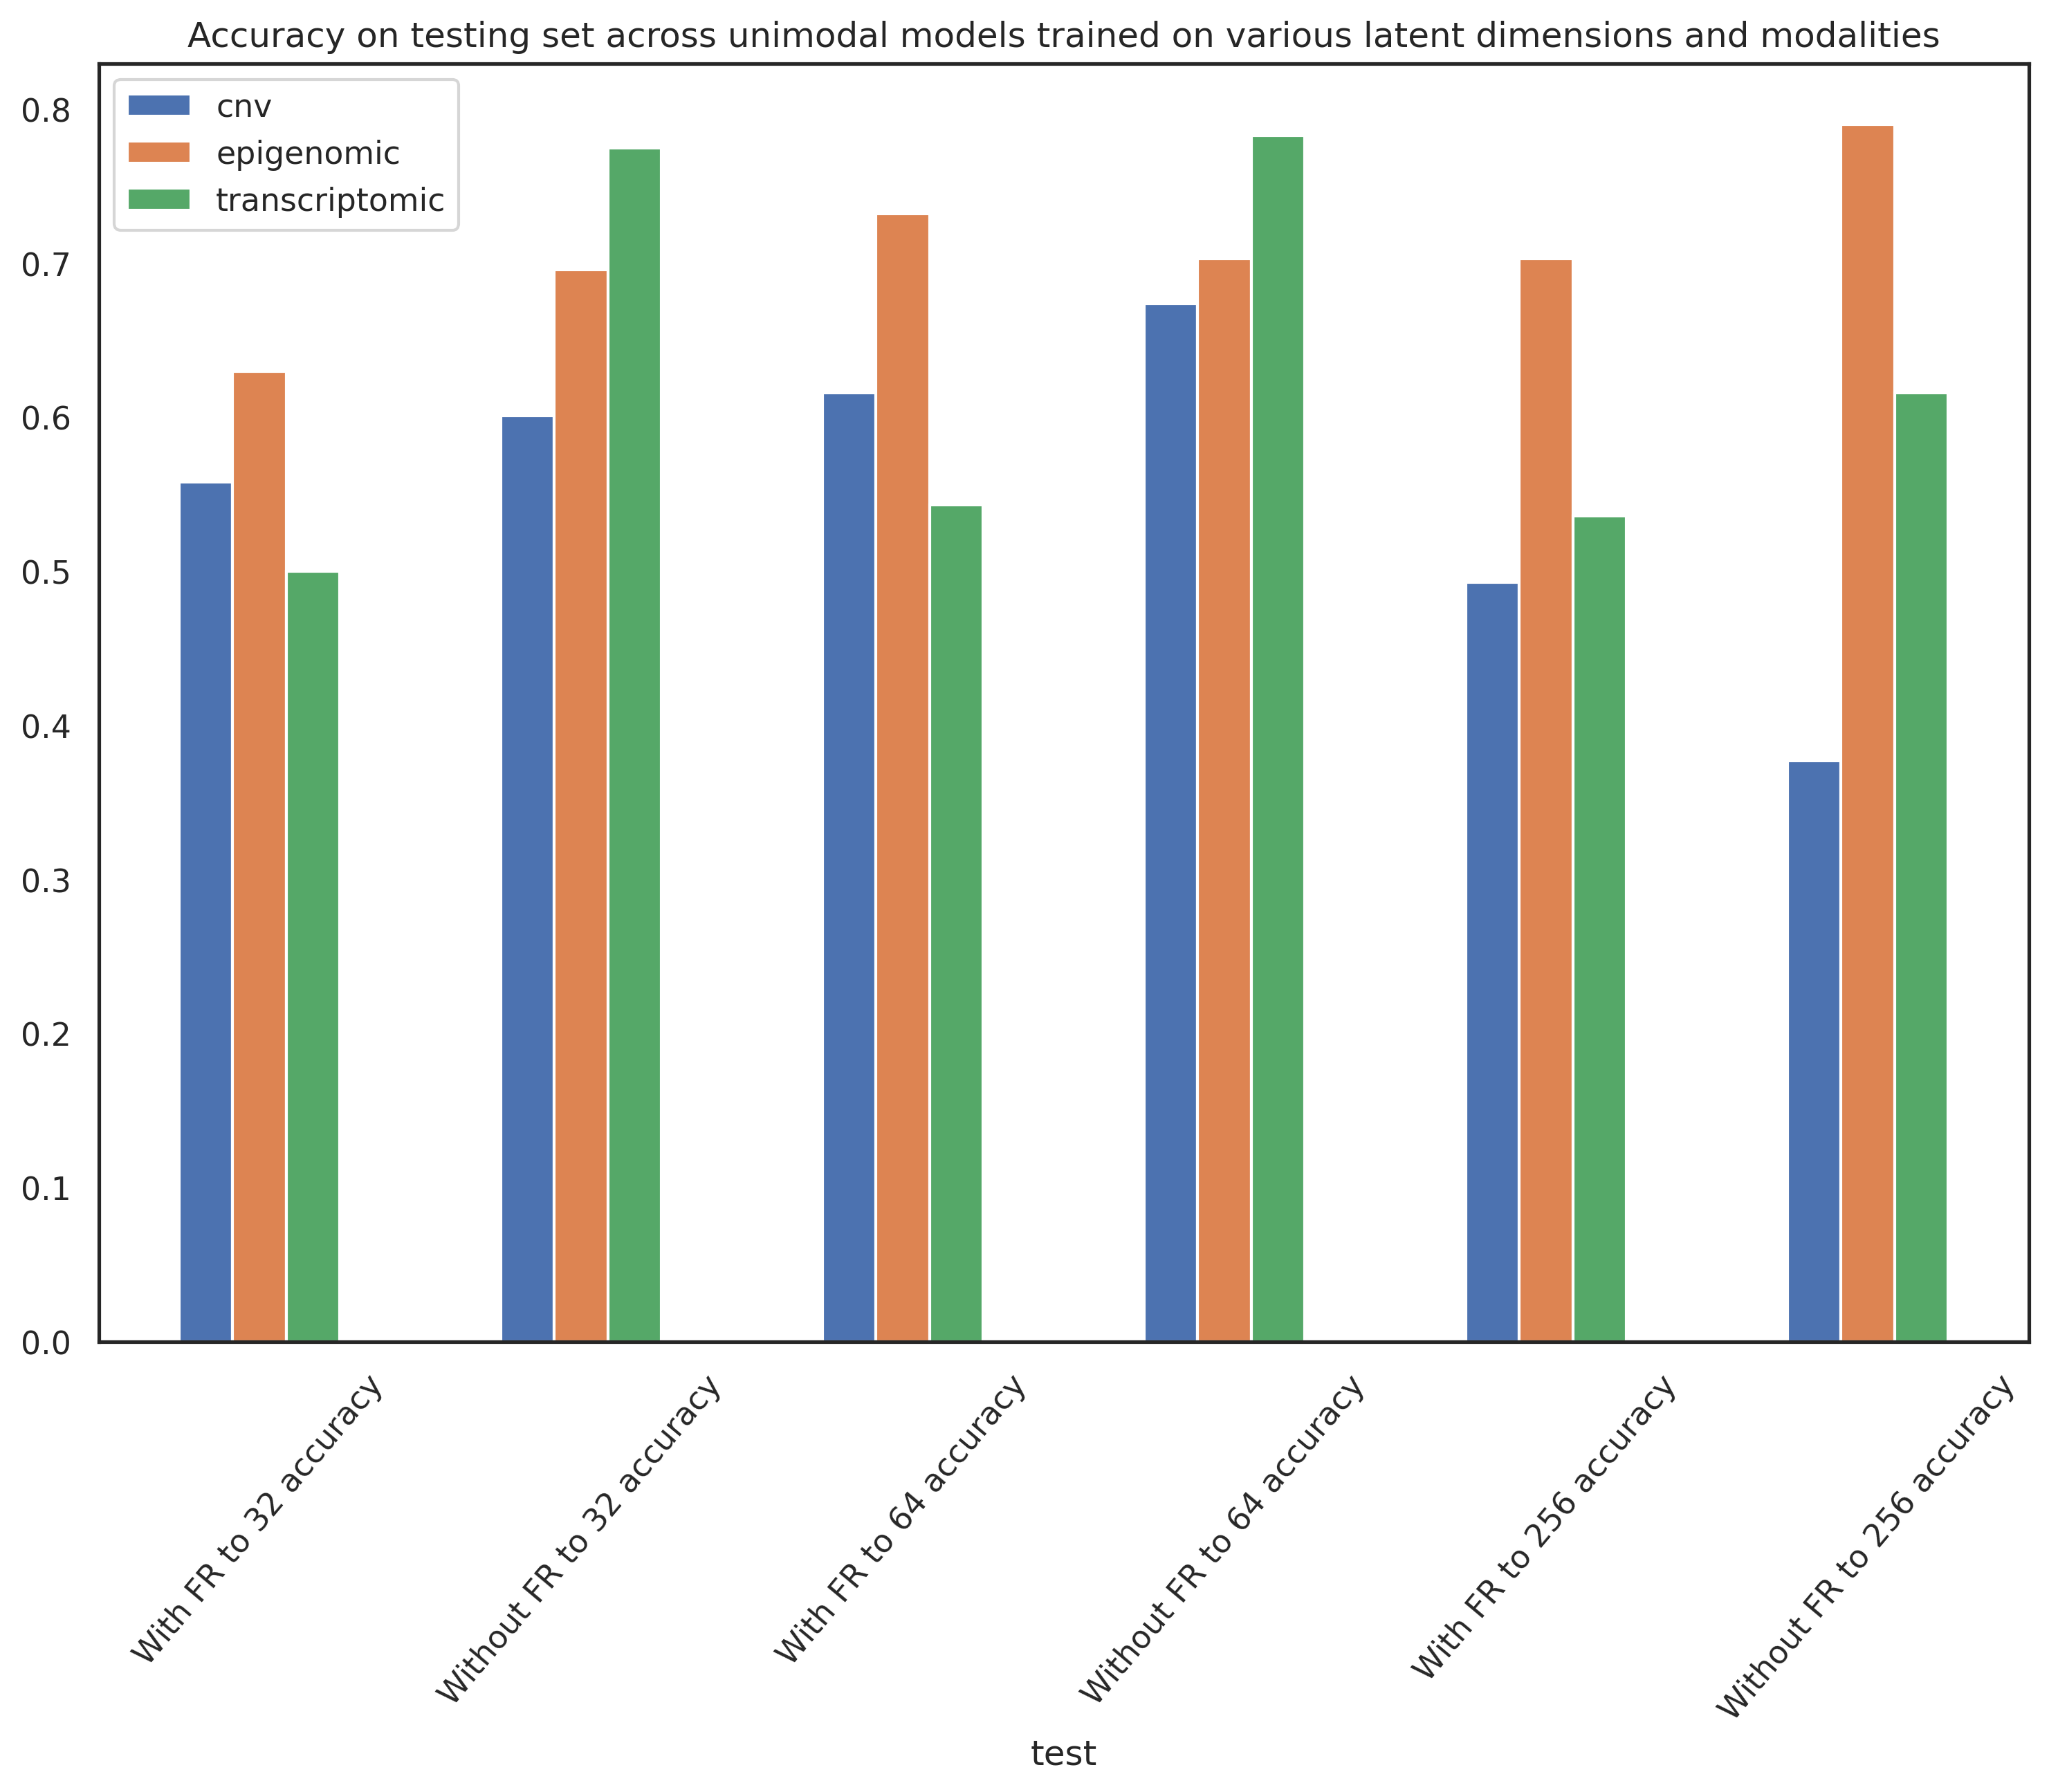

In [217]:
results_hp.plot(kind='bar', rot = 50, title = "Accuracy on testing set across unimodal models trained on various latent dimensions and modalities")